In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pandas matplotlib plotly tensorflow 

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install plotly==5.15.0

Note: you may need to restart the kernel to use updated packages.


In [27]:
pip install -U kaleido

  Using cached kaleido-0.2.1-py2.py3-none-macosx_10_11_x86_64.whl (85.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as pyoff
import plotly.graph_objs as go
import plotly.io as pio

In [15]:
df = pd.read_csv('../data/alteryx_trifacta_audible_cleaned.csv')
print('Shape of datatset :', df.shape)
df.head()

Shape of datatset : (22836, 8)


,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


In [16]:
df = pd.read_csv('../data/alteryx_trifacta_audible_cleaned.csv')
df.head(3)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00


In [7]:
print(f'Null values in the dataset: {df.isna().sum().sum()}')
print('-' * 30)
print(f'Duplicate values in the dataset: {df.duplicated().sum()}')
print('-' * 30)
print(f'Shape of our dataset: {df.shape}')

Null values in the dataset: 0
------------------------------
Duplicate values in the dataset: 0
------------------------------
Shape of our dataset: (87489, 8)


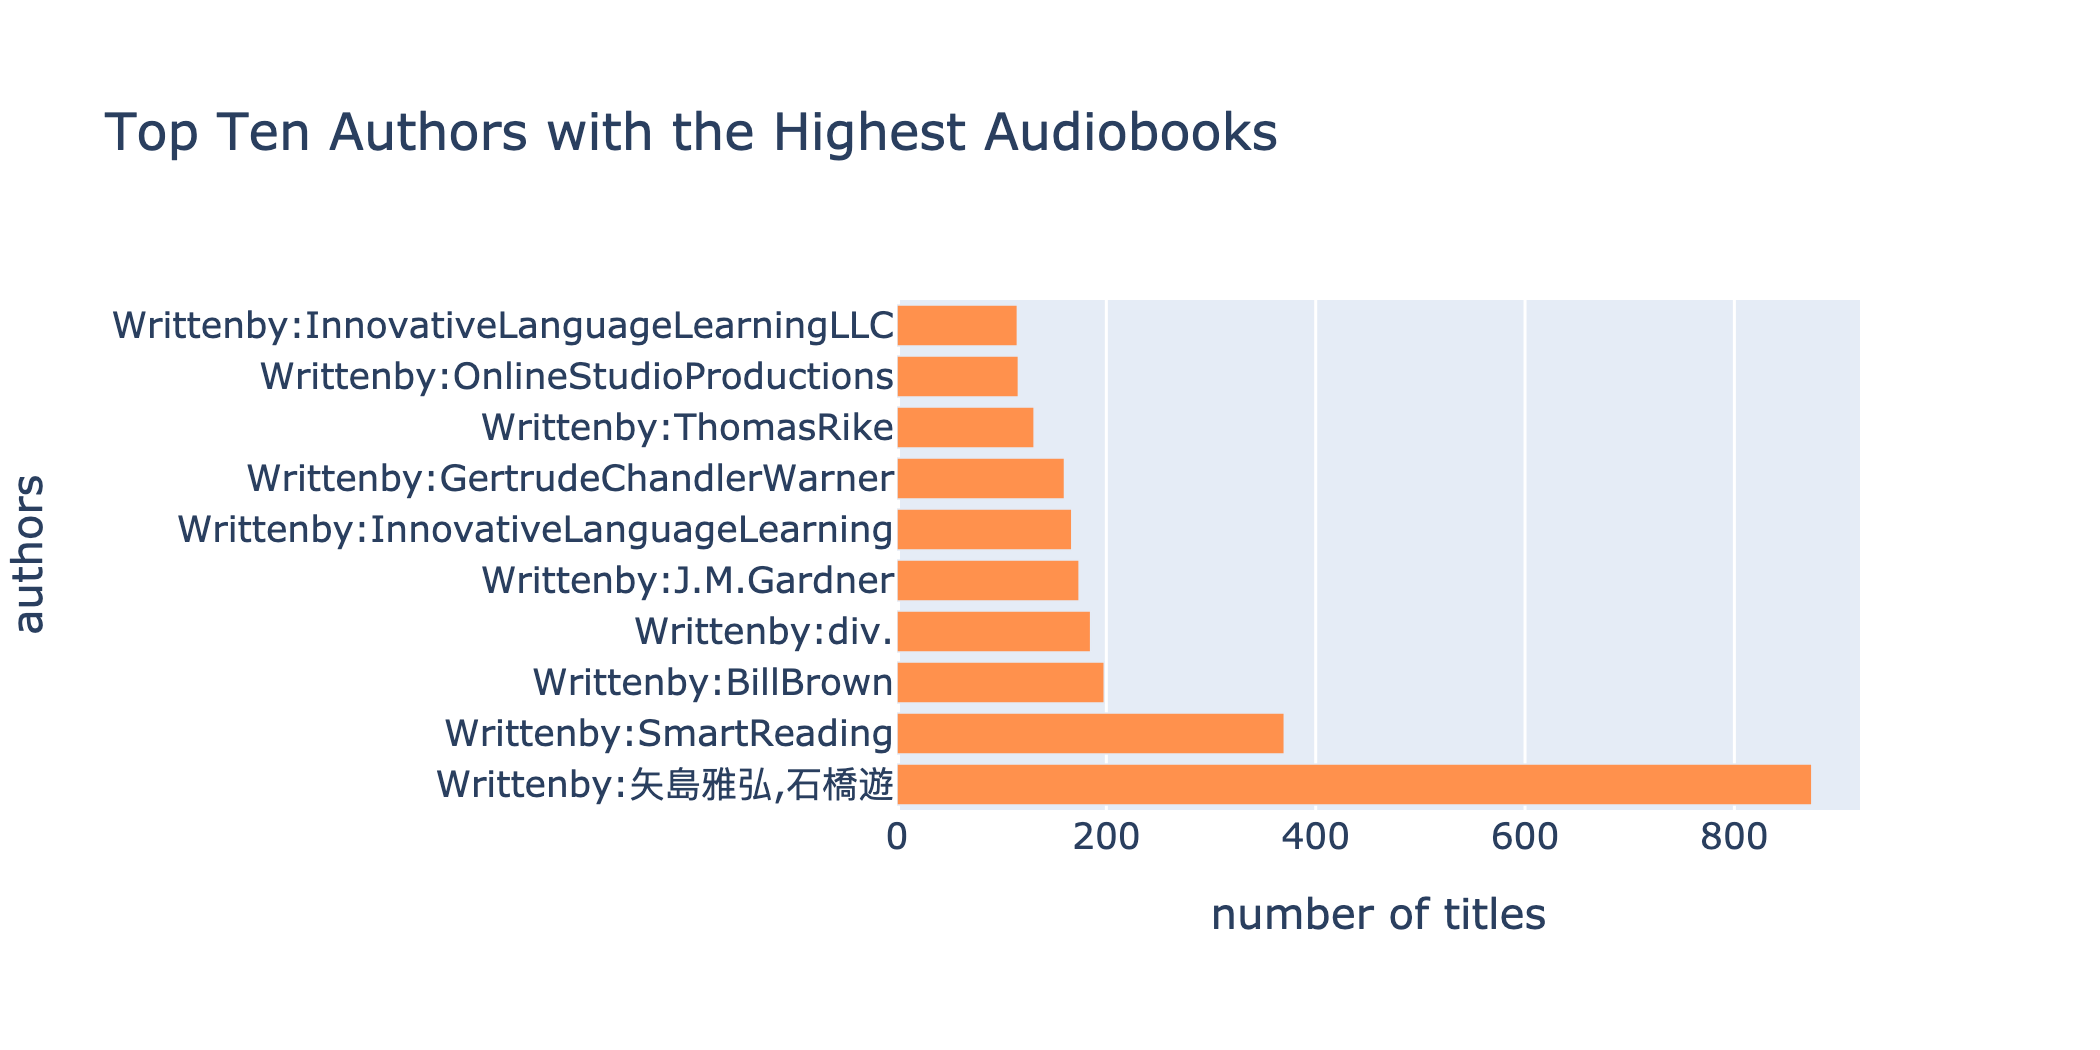

In [7]:
import plotly.express as px
author_titles = df.author.value_counts().sort_values(ascending=False)[:10]
fig = px.bar(x=author_titles.values, y=author_titles.index, title="Top Ten Authors with the Highest Audiobooks", labels=dict(x="number of titles", y="authors"))
fig.update_traces(marker_color='#FF914D')
fig.show(renderer="png", height=350, width=700, scale=3)
pio.write_image(fig, "images/trifacta/fig1.png",scale=6, width=700, height=350)

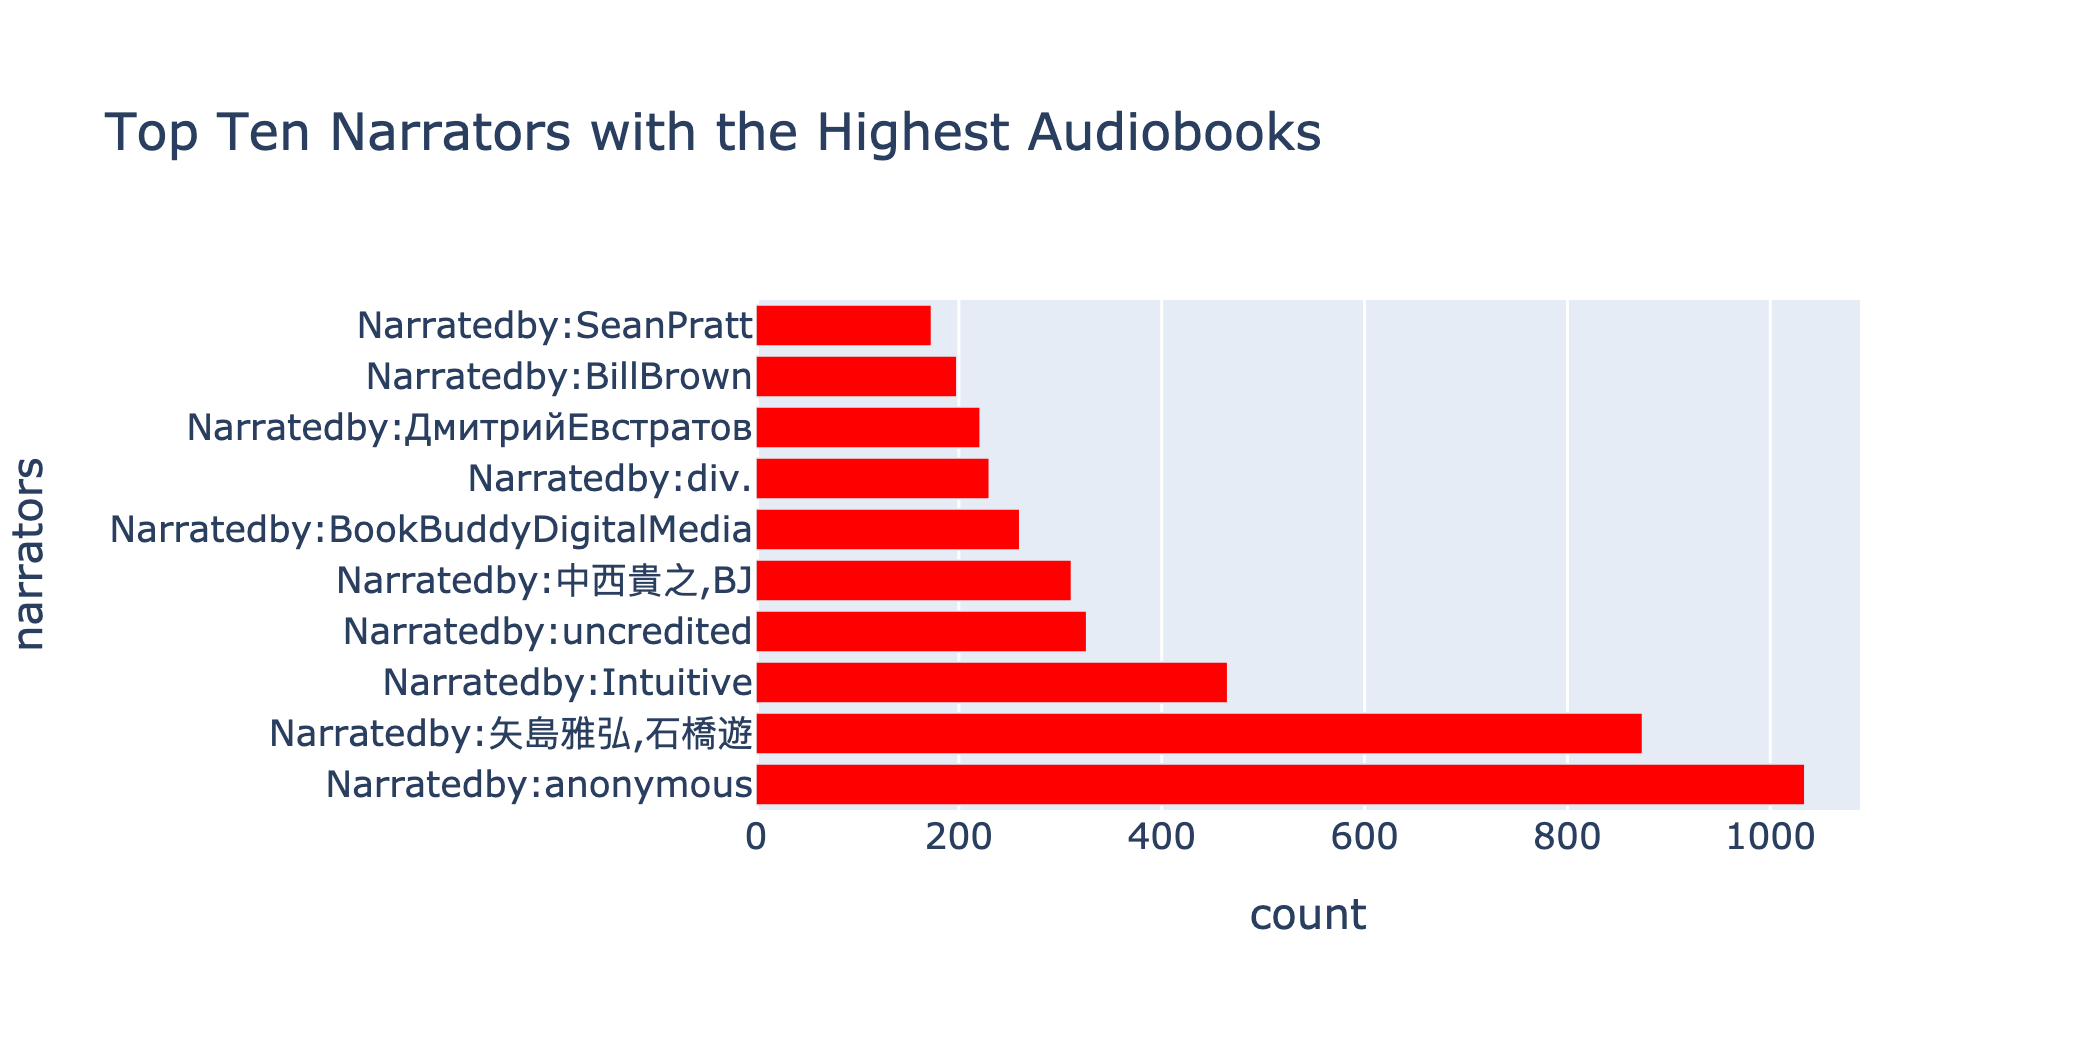

In [73]:
import plotly.express as px
narrator_titles = df.narrator.value_counts().sort_values(ascending=False)[:10]
fig = px.bar(x=narrator_titles.values, y=narrator_titles.index, title="Top Ten Narrators with the Highest Audiobooks", labels=dict(x="count", y="narrators"))
fig.update_traces(marker_color='red')
fig.show(renderer="png", height=350, width=700, scale=3)
pio.write_image(fig, "images/fig2.png",scale=6, width=700, height=350)

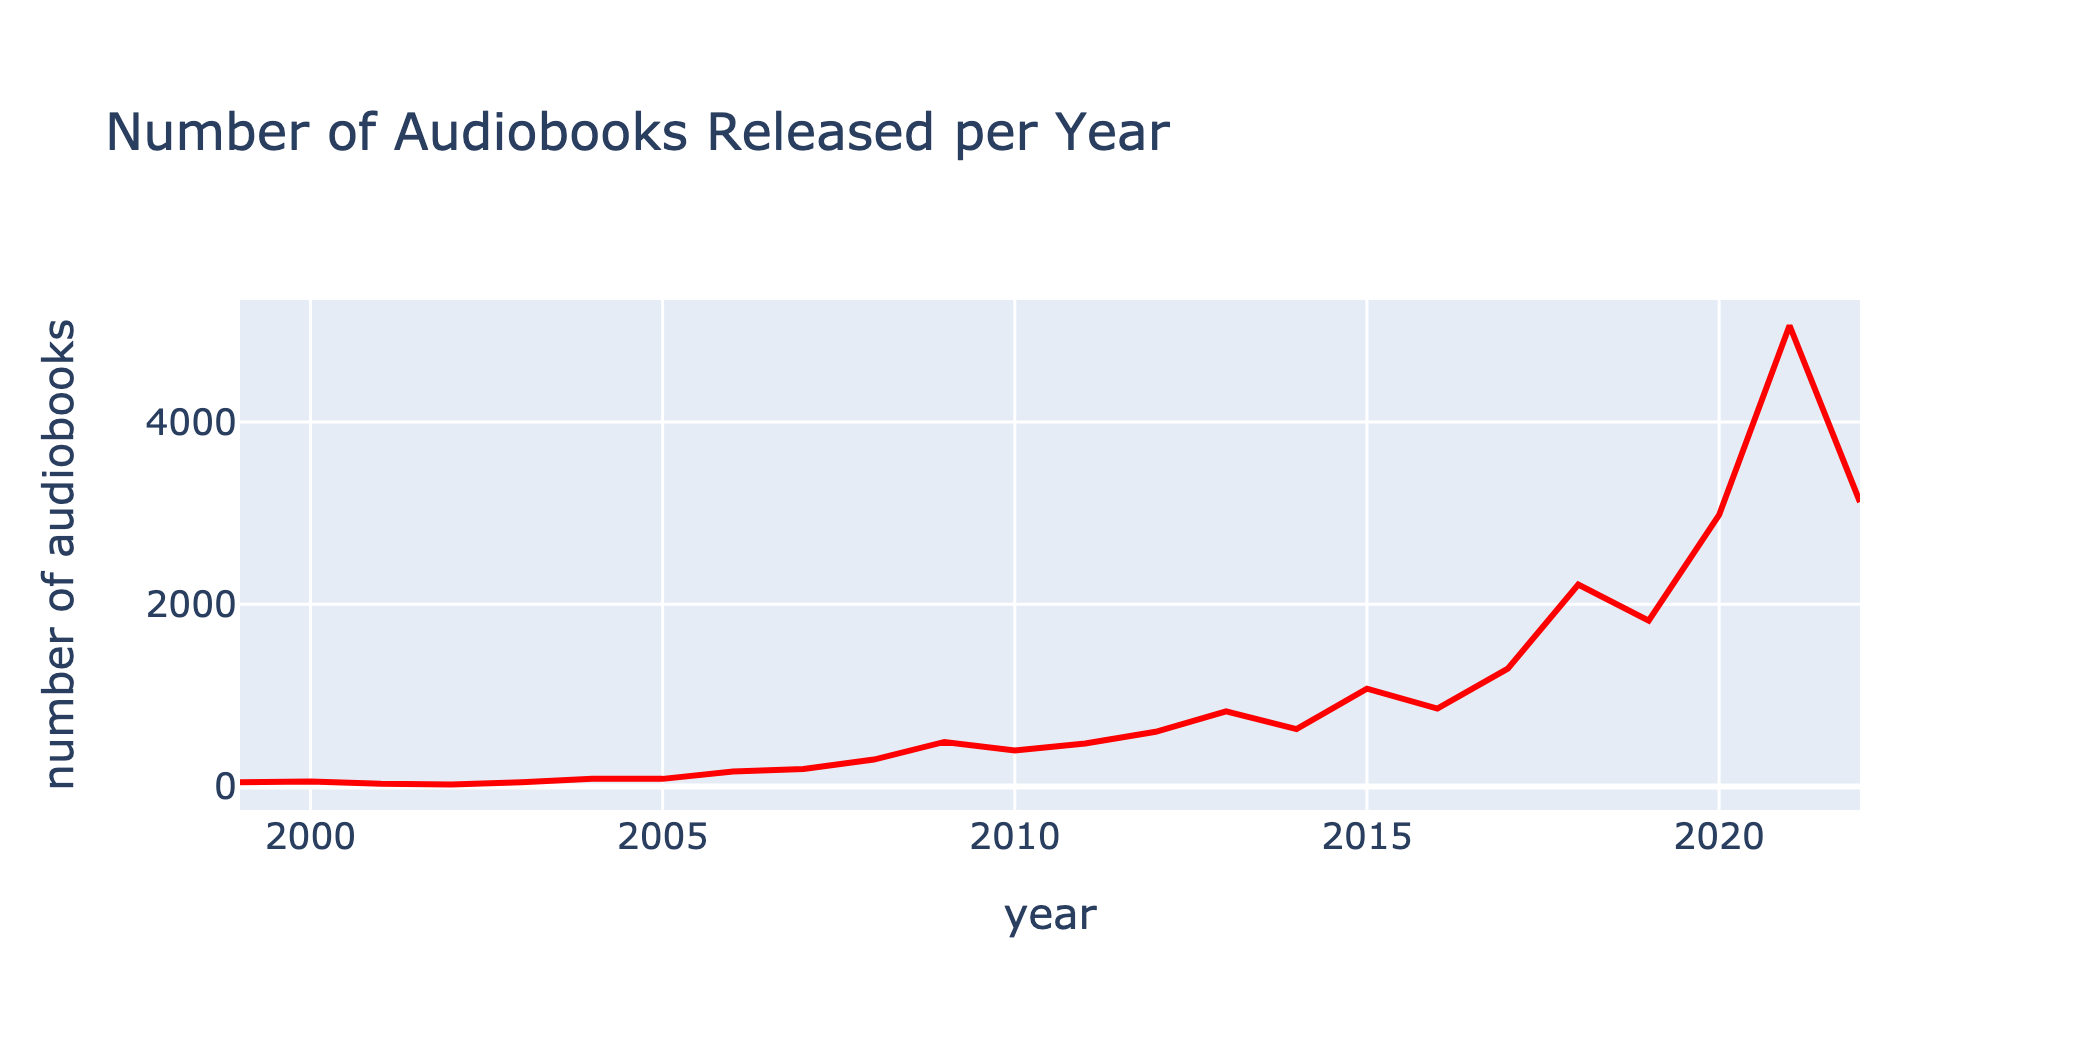

In [9]:
df.releasedate = pd.to_datetime(df.releasedate)
df['year'] = pd.DatetimeIndex(df['releasedate']).year
yearly_books = df.year.value_counts().sort_index()
fig = px.line(x= yearly_books.index, y=yearly_books.values, title="Number of Audiobooks Released per Year", labels=dict(x="year", y="number of audiobooks"))
fig.update_traces(line_color='red')
fig.show(renderer="png", height=350, width=700, scale=3)
pio.write_image(fig, "images/trifacta/fig2.png",scale=6, width=700, height=350)

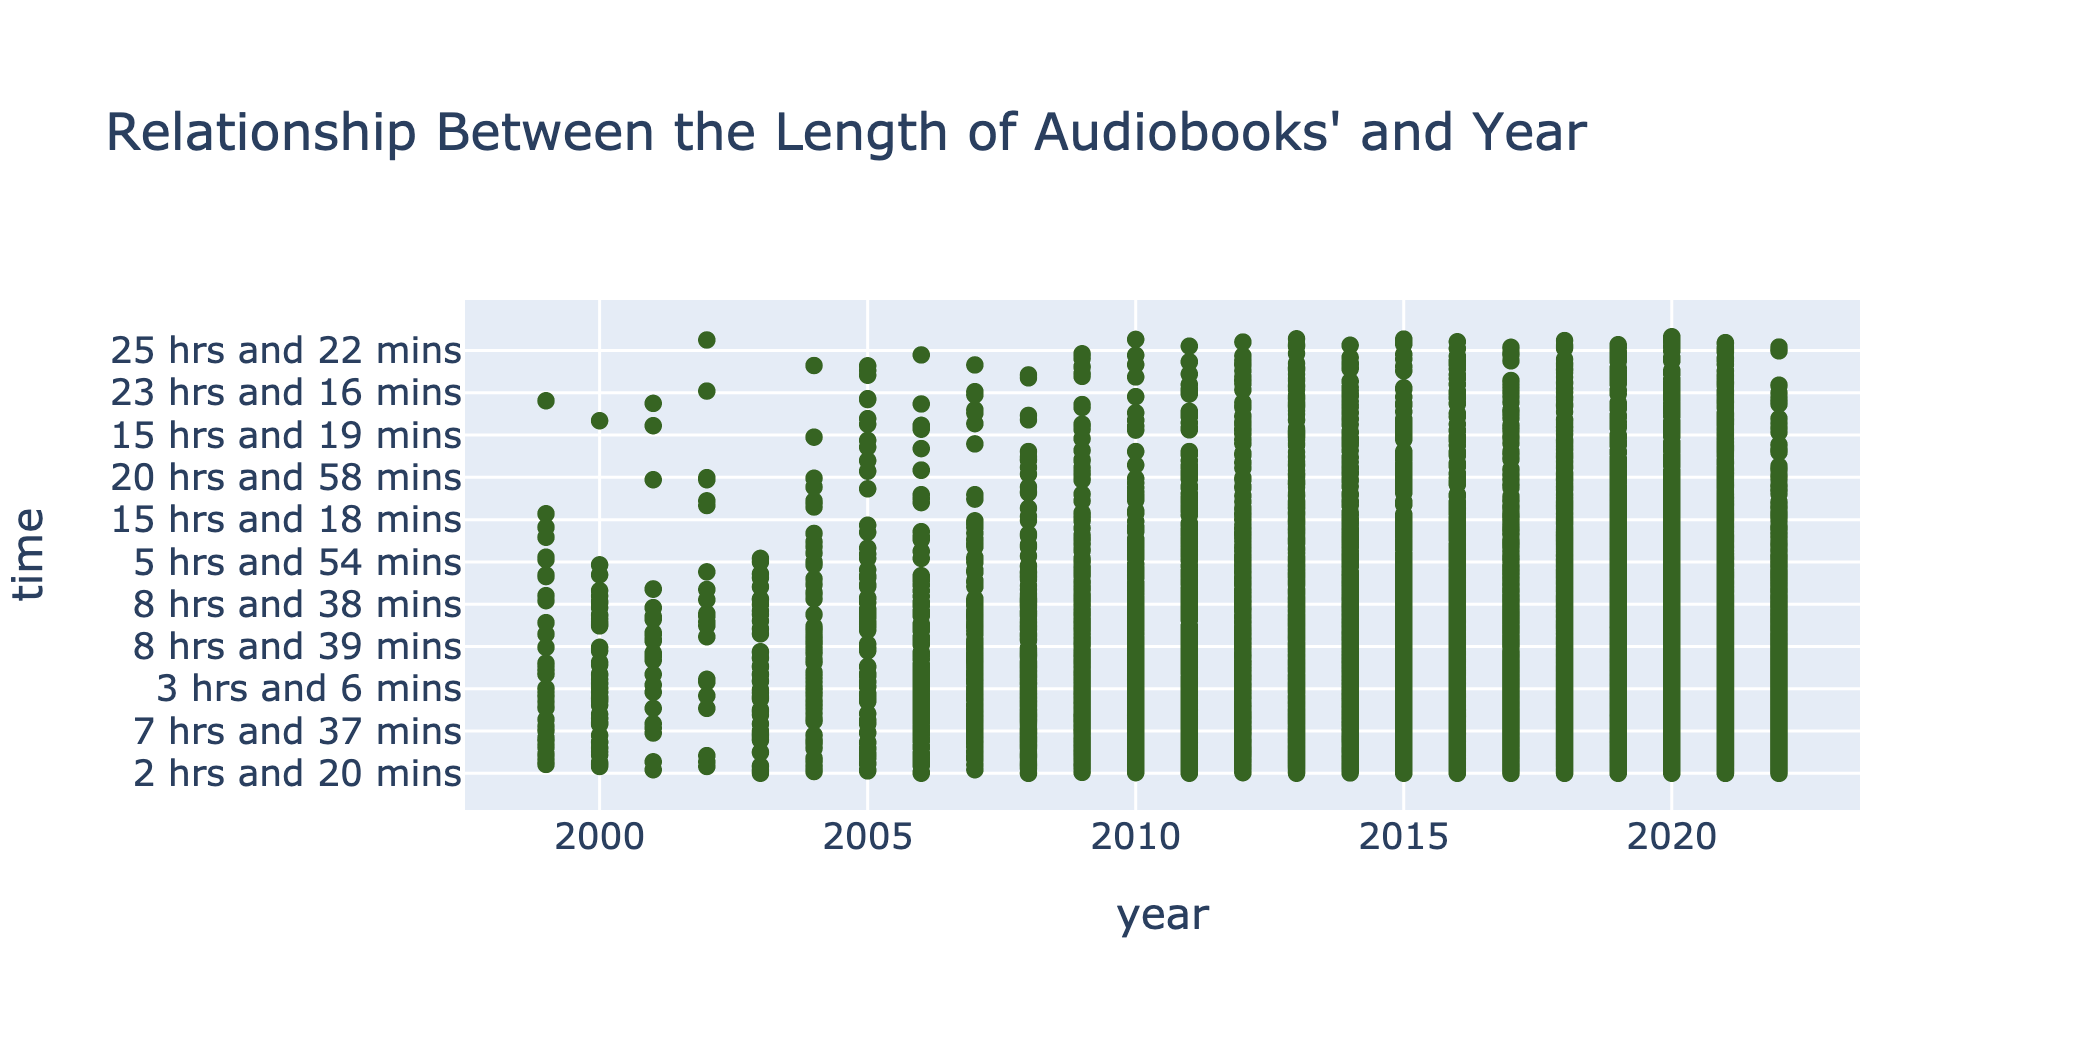

In [10]:
df.releasedate = pd.to_datetime(df.releasedate)
df['year'] = pd.DatetimeIndex(df['releasedate']).year
fig = px.scatter(x=df.year, y=df.time, title="Relationship Between the Length of Audiobooks' and Year", labels=dict(x="year", y="time"))
fig.update_traces(marker_color='#366422')
fig.show(renderer="png", height=350, width=700, scale=3)
pio.write_image(fig, "images/trifacta/fig3.png",scale=6, width=700, height=350)

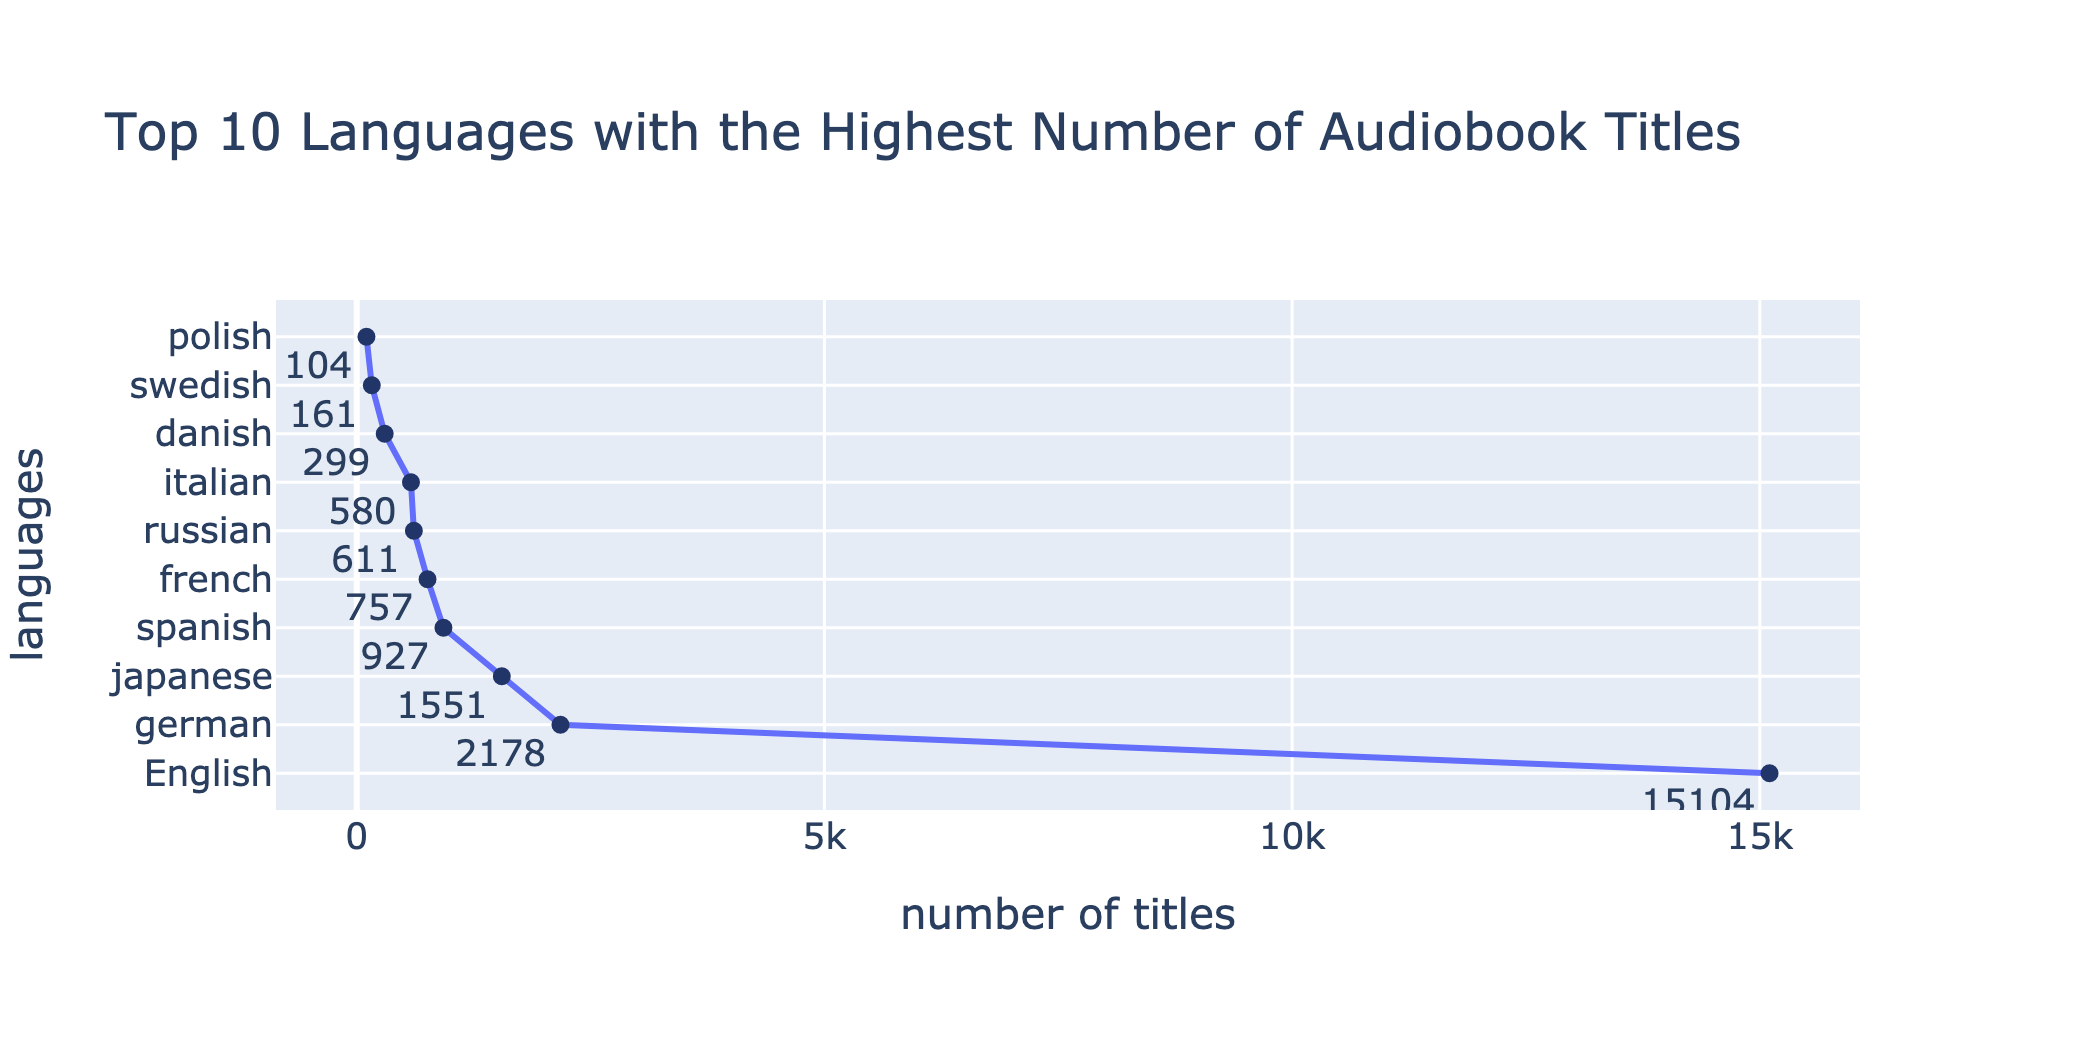

In [17]:
import plotly.express as px
lang_titles = df.language.value_counts().sort_values(ascending=False)[:10]
fig = px.line(x=lang_titles.values, y=lang_titles.index, title="Top 10 Languages with the Highest Number of Audiobook Titles", labels=dict(x="number of titles", y="languages"), markers=True, text=lang_titles.values)
fig.update_traces(textposition="bottom right")
fig.update_traces(marker_color='#213569', textposition="bottom left")
fig.show(renderer="png", height=350, width=700, scale=3)
pio.write_image(fig, "images/trifacta/fig4.png",scale=5, width=700, height=350)